In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [48]:
orig_data = pd.read_csv('/content/Multiple_Linear_Regression_GPA_SAT_Attendance.csv')

In [49]:
orig_data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [50]:
data = orig_data.copy()

In [51]:
data['Attendance'] = data['Attendance'].map({'Yes':1,'No': 0})

In [52]:
data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [53]:
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


In [54]:
y = data['GPA']
x_1 = data[['SAT','Attendance']]

In [55]:
x = sm.add_constant(x_1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           2.19e-15
Time:                        15:21:42   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

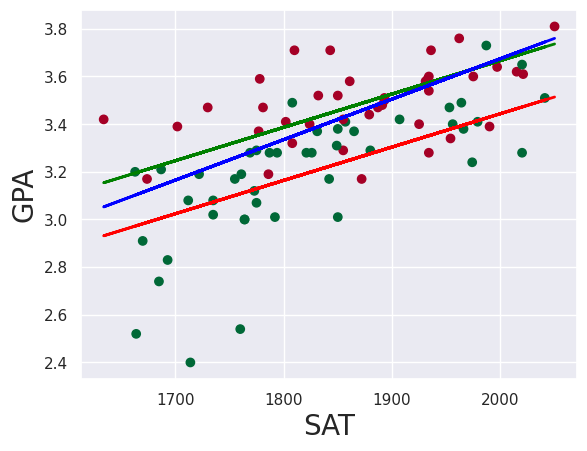

In [65]:
plt.scatter(data['SAT'],data['GPA'], c=data['Attendance'],cmap='RdYlGn_r')
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']
yhat = 0.0017*data['SAT'] + 0.275
fig = plt.plot(data['SAT'],yhat_no, lw=2, c='red', label ='low attendance')
fig = plt.plot(data['SAT'],yhat_yes, lw=2, c='green', label ='high attendance')
fig = plt.plot(data['SAT'],yhat, lw=2, c='blue', label ='original regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

In [66]:
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


In [60]:
predict_data = pd.DataFrame({'const': 1,'SAT': [1700, 1670], 'Attendance': [0, 1]})
predict_data = predict_data[['const','SAT','Attendance']]
predict_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [61]:
predict_data.rename(index={0: 'Student A',1:'Student B'})

,const,SAT,Attendance
Student A,1,1700,0
Student B,1,1670,1


In [62]:
predict = results.predict(predict_data)
predict

0    3.023513
1    3.204163
dtype: float64

In [64]:
predictdf = pd.DataFrame({'Predict':predict})
joined = predict_data.join(predictdf)
joined.rename(index={0: 'Student A',1:'Student B'})

,const,SAT,Attendance,Predict
Student A,1,1700,0,3.023513
Student B,1,1670,1,3.204163
